In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
data = pd.read_csv('datasets\Random_forest.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
#splitting dataset
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [4]:
#fitting model
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10, random_state = 0)
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

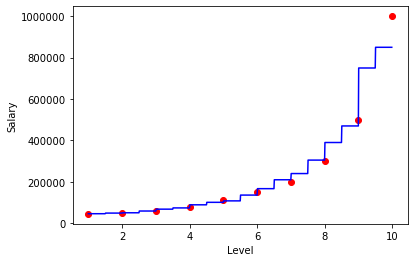

In [5]:
#visualize
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,y, c = 'red')
plt.plot(X_grid, reg.predict(X_grid), c = 'blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [6]:
#User Input Prediction
example = np.array([[7.5]])
y_pred = reg.predict(example)
print(y_pred)

[240000.]


In [7]:
#Dataset Predicted and Actual Values
result = pd.DataFrame({
    'Actual': np.array(y).flatten(),
    'Predicted': np.array(reg.predict(X).round().astype(int)).flatten(),
})
result

,Actual,Predicted
0,45000,46000
1,50000,49000
2,60000,59000
3,80000,74000
4,110000,101000
5,150000,136000
6,200000,210000
7,300000,305000
8,500000,470000
9,1000000,850000


### Check for MAE, MSE, R2-score, RMSE based on different n_estimators 

In [13]:
#Check for MAE, MSE, R2-score, RMSE based on different n_estimators
import random as rd
from sklearn.metrics import r2_score, mean_squared_error
i = rd.sample(range(100),10)
x,a,b,c,d = [],[],[],[],[]
for e in i:
    from sklearn.ensemble import RandomForestRegressor
    reg = RandomForestRegressor(n_estimators=e, random_state = 0)
    reg.fit(X,y)
    pred = reg.predict(X)
    x.append(e)
    a.append(np.mean(np.absolute(pred - y)).round(decimals = 2))
    b.append(np.sqrt(mean_squared_error(y, pred)).round(decimals = 2))
    c.append(r2_score(pred , y).round(decimals = 2))
    d.append(np.sqrt(np.mean((pred - y) ** 2)).round(decimals = 2))
    
    rand_check = pd.DataFrame({
        'n_estimators': np.array(x).flatten(),
        'MAE': np.array(a).flatten(),
        'MSE': np.array(b).flatten(),
        'R2-Score': np.array(c).flatten(),
        'RMSE': np.array(d).flatten(),
    })
rand_check

,n_estimators,MAE,MSE,R2-Score,RMSE
0,35,26814.29,73346.44,0.89,73346.44
1,9,33000.00,60696.57,0.93,60696.57
2,80,26437.50,65478.66,0.92,65478.66
3,81,27283.95,67474.30,0.91,67474.30
4,36,26430.56,71351.60,0.90,71351.60
5,60,25658.33,66271.58,0.92,66271.58
6,63,25682.54,65660.94,0.92,65660.94
7,75,26073.33,66626.38,0.92,66626.38
8,91,26159.34,69082.49,0.91,69082.49
9,95,26915.79,71190.65,0.90,71190.65


### Check for minimum RMSE and returning best best n_estimator

In [14]:
#Check for minimum RMSE and returning best best n_estimator
#p = np.where(d == np.amin(d))
p= d.index(min(d))
print("Best n_estimator value: ", x[p])
evaluation = pd.DataFrame({
    'n_estimators': np.array(x[p]).flatten(),
    'MAE': np.array(a[p]).flatten(),
    'MSE': np.array(b[p]).flatten(),
    'R2-Score': np.array(c[p]).flatten(),
    'RMSE': np.array(d[p]).flatten(),
})
evaluation

Best n_estimator value:  9


,n_estimators,MAE,MSE,R2-Score,RMSE
0,9,33000.0,60696.57,0.93,60696.57
